- Steps Taken - Classification Modelling:
- Get Data
- Data Cleaning
- Exploratory Data Analysis
- Data Preprocessing and Feature Engineering
- Feature Selection
- Model Selection and Training
- Model Evaluation
- Model Deployment

In [5]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#import Data
data = pd.read_csv('/content/Financial_inclusion_dataset.csv')
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [7]:
# Display general information about the dataset
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [9]:
#Data Cleaning
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [10]:
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')

display(num.head())
print(f'\n\n')
display(cat.head())

,year,household_size,age_of_respondent
0,2018,3,24
1,2018,5,70
2,2018,5,26
3,2018,5,34
4,2018,8,26


,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,uniqueid_1,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,uniqueid_2,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,uniqueid_3,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,uniqueid_4,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,uniqueid_5,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


In [11]:
	# Ensure Data Consistency
data['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [12]:
#Data Preprocessing And Feature Engineering
# convert all text columns to numbers
# since there is low deviation from the mean, no need scaling

# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in cat.columns:
    if i in data.columns:
        data[i] = encoder.fit_transform(data[i])

data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,0,1,3,24,0,5,2,3,9
1,0,2018,1111,0,0,0,5,70,0,1,4,0,4
2,0,2018,2222,1,1,1,5,26,1,3,3,5,9
3,0,2018,3333,0,0,1,5,34,0,1,2,2,3
4,0,2018,4444,0,1,0,8,26,1,0,3,2,5


**Feature Selection**

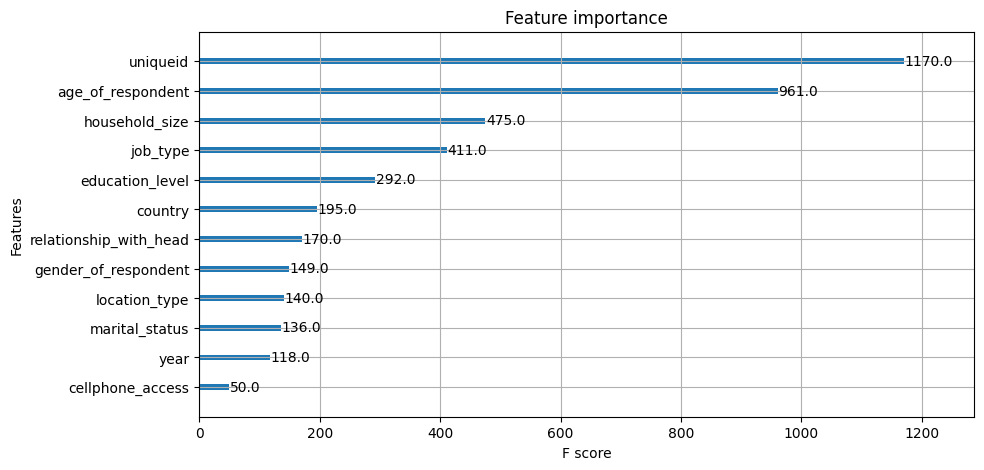

In [13]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = data.drop('bank_account', axis = 1)
y = data.bank_account

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [14]:
x

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,0,1,3,24,0,5,2,3,9
1,0,2018,1111,0,0,5,70,0,1,4,0,4
2,0,2018,2222,1,1,5,26,1,3,3,5,9
3,0,2018,3333,0,1,5,34,0,1,2,2,3
4,0,2018,4444,1,0,8,26,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,1239,0,1,4,48,0,1,0,0,7
23520,3,2018,1240,0,1,2,27,0,1,3,3,7
23521,3,2018,1241,0,1,5,27,0,4,4,2,7
23522,3,2018,1242,1,1,7,30,0,4,0,3,9


In [15]:
sel_columns = ['age_of_respondent', 'household_size', 'job_type', 'education_level',
  'country', 'relationship_with_head', 'gender_of_respondent', 'location_type', 'marital_status', 'year', 'cellphone_access', 'bank_account' ]

sel_data = data[sel_columns]
sel_data

,age_of_respondent,household_size,job_type,education_level,country,relationship_with_head,gender_of_respondent,location_type,marital_status,year,cellphone_access,bank_account
0,24,3,9,3,0,5,0,0,2,2018,1,1
1,70,5,4,0,0,1,0,0,4,2018,0,0
2,26,5,9,5,0,3,1,1,3,2018,1,1
3,34,5,3,2,0,1,0,0,2,2018,1,0
4,26,8,5,2,0,0,1,1,3,2018,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,48,4,7,0,3,1,0,0,0,2018,1,0
23520,27,2,7,3,3,1,0,0,3,2018,1,0
23521,27,5,7,2,3,4,0,0,4,2018,1,0
23522,30,7,9,3,3,4,0,1,0,2018,1,0


<b><h3>Model Selection

In [16]:
x = sel_data.drop('bank_account', axis = 1)
y = sel_data.bank_account

# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

<Axes: xlabel='bank_account', ylabel='count'>

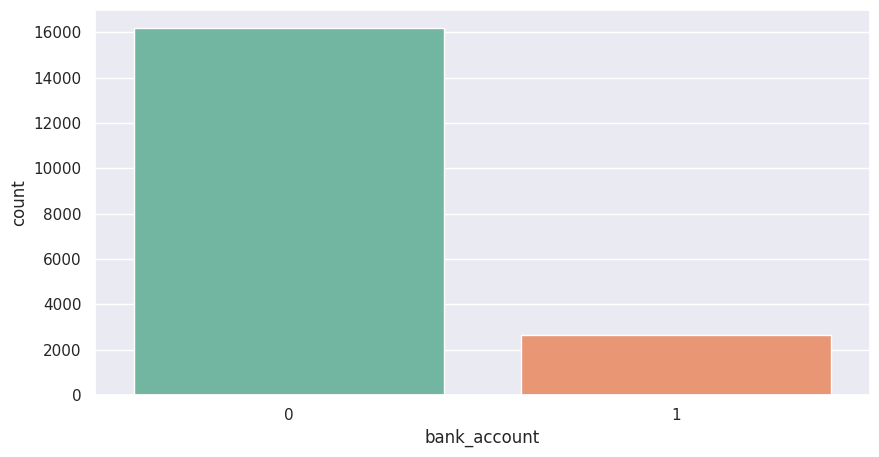

In [17]:
sns.set(style= 'darkgrid')
sns.countplot(x = ytrain, palette = 'Set2')

In [ ]:
#Algorithm imbalance so we will smote it

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


logreg = LogisticRegression()

logreg.fit(xtrain, ytrain)

cross_val = logreg.predict(xtrain)
print(classification_report(cross_val, ytrain))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     18049
           1       0.19      0.65      0.29       770

    accuracy                           0.87     18819
   macro avg       0.59      0.77      0.61     18819
weighted avg       0.95      0.87      0.90     18819



<hr>
<h3><b>Random oversampling using Synthetic Minority Oversampling Technique (SMOTE)

In [19]:
from imblearn.over_sampling import SMOTE
 # To get the best random state to use
score = []
for i in range(100):
    smote = SMOTE(sampling_strategy= 'auto', random_state = i)
    X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

    test_model = LogisticRegression()
    test_model.fit(X_resampled, y_resampled)

    cross_val = test_model.predict(X_resampled)
    score.append(accuracy_score(cross_val, y_resampled))

print(f'Highest Random State is: {np.array(score).argmax()}')

Highest Random State is: 62


In [20]:
smote = SMOTE(sampling_strategy= 'auto', random_state=62)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

<Axes: xlabel='bank_account', ylabel='count'>

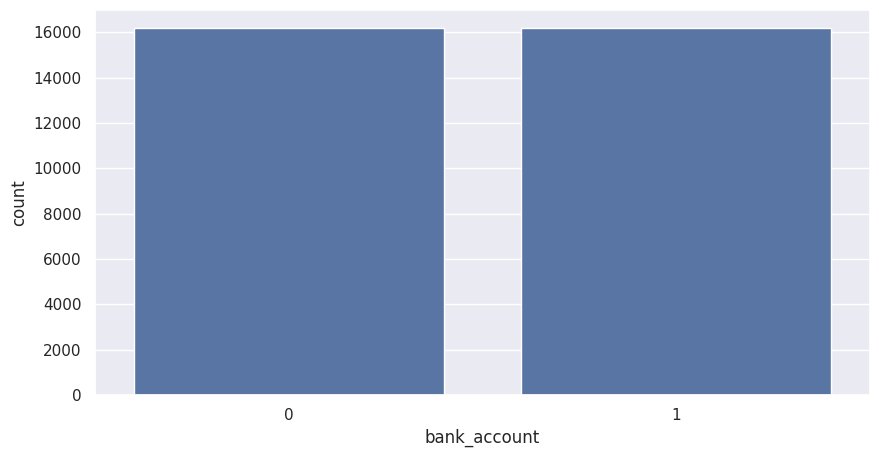

In [21]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['bank_account'])

In [22]:
logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)

cross_val = logreg.predict(X_resampled)
print(classification_report(cross_val, y_resampled))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     15837
           1       0.74      0.73      0.74     16501

    accuracy                           0.73     32338
   macro avg       0.73      0.73      0.73     32338
weighted avg       0.73      0.73      0.73     32338



**Interpretation:**

--The classification report you provided is a summary of the performance of a binary classification model, which seems to be predicting  which individuals are most likely to have or use a bank account. Here's an interpretation of the key metrics:

**--Precision**

- Precision for class 0 (individuals not having or using a bank account): 0.75
- Precision for class 1 (individuals having or using a bank account): 0.79


In summary, the model achieves an overall accuracy of 77%, indicating a reasonable performance in predicting which individuals are most likely to have or use a bank account. Precision, recall, and F1-score metrics provide insights into the model's effectiveness for each class, and the support values give context to the distribution of instances in the dataset.

In [23]:
import pickle, joblib
pickle.dump(logreg, open('FinaSmartPredictmodel.pkl', "wb"))